<a href="https://colab.research.google.com/github/0-0Jay/Machine-Learning/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EA%B3%BC%EC%A0%9C_%EC%9E%8E_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 블로그 : https://data-panic.tistory.com/13

<h1>데이터 전처리</h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms

In [10]:
trans = transforms.Compose([transforms.Resize((80, 120)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                            ])
train_set = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/leaf", transform = trans)

In [11]:
train_set.__getitem__(70)

(tensor([[[-0.8431, -0.8353, -0.8431,  ..., -0.8353, -0.8353, -0.8353],
          [-0.8275, -0.8431, -0.8353,  ..., -0.8353, -0.8431, -0.8431],
          [-0.8353, -0.8431, -0.8431,  ..., -0.8353, -0.8353, -0.8431],
          ...,
          [-0.8431, -0.8353, -0.8353,  ..., -0.8353, -0.8353, -0.8353],
          [-0.8510, -0.8431, -0.8431,  ..., -0.8275, -0.8353, -0.8353],
          [-0.8510, -0.8510, -0.8431,  ..., -0.8275, -0.8275, -0.8275]],
 
         [[-0.8431, -0.8431, -0.8353,  ..., -0.8275, -0.8275, -0.8353],
          [-0.8275, -0.8510, -0.8431,  ..., -0.8275, -0.8353, -0.8353],
          [-0.8353, -0.8510, -0.8431,  ..., -0.8275, -0.8275, -0.8353],
          ...,
          [-0.8824, -0.8745, -0.8745,  ..., -0.8431, -0.8431, -0.8353],
          [-0.8902, -0.8824, -0.8824,  ..., -0.8353, -0.8431, -0.8431],
          [-0.8902, -0.8902, -0.8824,  ..., -0.8353, -0.8353, -0.8353]],
 
         [[-0.8118, -0.8039, -0.8039,  ..., -0.7961, -0.7961, -0.7961],
          [-0.7882, -0.8118,

In [5]:
classes = train_set.classes
classes

['Basil', 'Chinar', 'Jamun', 'Lemon', 'Mango']

<h1>DataLoader를 통해 데이터 Batch형식으로 업로드</h1>
-> 훈련 세트를 섞어서 모델 정확도 높임

In [6]:
len(train_set)

730

In [18]:
train_loader = DataLoader(train_set, batch_size = 730, shuffle = True, num_workers = 2)

data_iter = iter(train_loader)
images, labels = next(iter(data_iter))
print(labels)

tensor([0, 4, 3, 1, 3, 0, 1, 0, 1, 1, 0, 2, 4, 4, 3, 0, 4, 0, 3, 3, 1, 4, 2, 3,
        2, 3, 0, 3, 2, 4, 1, 4, 4, 1, 2, 0, 3, 4, 0, 4, 0, 2, 4, 4, 2, 4, 0, 4,
        1, 3, 3, 2, 3, 3, 2, 3, 0, 3, 2, 0, 4, 3, 3, 2, 0, 1, 4, 2, 4, 4, 2, 4,
        3, 4, 0, 3, 0, 0, 1, 0, 3, 4, 4, 1, 4, 3, 2, 0, 4, 1, 3, 3, 2, 3, 1, 0,
        3, 0, 3, 0, 4, 4, 4, 3, 4, 4, 3, 1, 0, 3, 0, 0, 3, 0, 4, 2, 2, 1, 3, 3,
        2, 3, 3, 3, 1, 2, 3, 1, 4, 3, 0, 0, 2, 0, 3, 3, 3, 4, 2, 3, 3, 2, 0, 1,
        3, 3, 0, 2, 1, 4, 1, 0, 1, 3, 2, 2, 0, 0, 2, 1, 1, 4, 4, 2, 0, 4, 3, 3,
        1, 2, 0, 3, 4, 4, 0, 0, 2, 2, 2, 3, 1, 4, 4, 2, 4, 4, 3, 2, 4, 0, 1, 3,
        0, 0, 0, 1, 2, 2, 4, 0, 3, 0, 4, 2, 3, 4, 3, 2, 0, 2, 2, 2, 1, 2, 3, 2,
        3, 0, 2, 0, 4, 4, 4, 2, 2, 3, 0, 3, 4, 4, 1, 4, 1, 4, 2, 0, 1, 1, 3, 0,
        2, 0, 3, 0, 3, 1, 4, 0, 3, 2, 0, 4, 4, 4, 1, 2, 4, 3, 2, 4, 2, 3, 4, 4,
        3, 4, 2, 2, 4, 4, 1, 0, 4, 4, 2, 4, 1, 1, 3, 4, 3, 2, 1, 3, 3, 3, 4, 2,
        3, 2, 1, 0, 0, 4, 4, 3, 2, 4, 3,

<h1>이미지 데이터 시각화</h1>

In [19]:
# 데이터 시각화 함수
def imshow(img):
  img = img / 2 + 0.5
  np_img = img.numpy()
  plt.imshow(np.transpose(np_img, (1, 2, 0)))

  print(np_img.shape)
  print((np.transpose(np_img, (1, 2, 0))).shape)

torch.Size([730, 3, 80, 120])
(3, 330, 490)
(330, 490, 3)
torch.Size([730, 3, 80, 120])
torch.Size([3, 7546, 978])

Basil Mango Lemon Chinar 
Lemon Basil Chinar Basil 
Chinar Chinar Basil Jamun 
Mango Mango Lemon Basil 

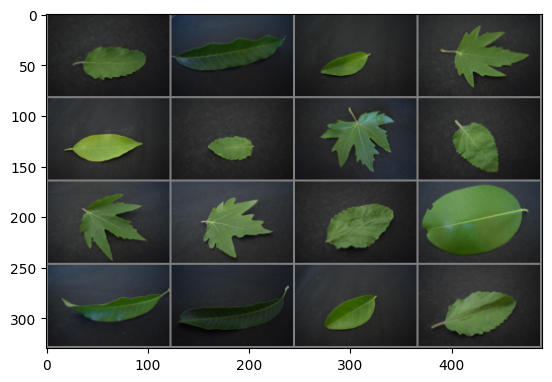

In [21]:
print(images.shape)
imshow(torchvision.utils.make_grid(images[:16], nrow = 4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)

for i in range(16):
  if i % 4 == 0: print()
  print("%5s" % classes[labels[i]], end=" ")

<h1>이미지 학습 모델 생성</h1>

In [22]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(3, 80, 120,),name='input'),
    keras.layers.Dense(100, activation='relu', name='dense1'),
    keras.layers.Dense(100, activation='relu', name='dense2'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name = 'leaf_classifier_model')
model.summary()

Model: "leaf_classifier_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 28800)             0         
                                                                 
 dense1 (Dense)              (None, 100)               2880100   
                                                                 
 dense2 (Dense)              (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 2891210 (11.03 MB)
Trainable params: 2891210 (11.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
train_input, test_input, train_target, test_target = train_test_split(images, labels, stratify=labels, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)
train_input = train_input.numpy().astype(np.int32)
test_input = test_input.numpy().astype(np.int32)
train_target = train_target.numpy().astype(np.int32)
test_target = test_target.numpy().astype(np.int32)

torch.Size([584, 3, 80, 120]) torch.Size([146, 3, 80, 120])


In [59]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_input, train_target, epochs=5)

Epoch 1/5
19/19 [==============================] - 1s 34ms/step - loss: 2.2913 - accuracy: 0.2106
Epoch 2/5
19/19 [==============================] - 1s 32ms/step - loss: 2.2592 - accuracy: 0.2329
Epoch 3/5
19/19 [==============================] - 1s 32ms/step - loss: 2.2280 - accuracy: 0.2329
Epoch 4/5
19/19 [==============================] - 0s 25ms/step - loss: 2.1983 - accuracy: 0.2329
Epoch 5/5
19/19 [==============================] - 0s 22ms/step - loss: 2.1702 - accuracy: 0.2329


In [60]:
model.evaluate(test_input, test_target)

5/5 [==============================] - 0s 11ms/step - loss: 2.1545 - accuracy: 0.2329


[2.154494047164917, 0.232876718044281]

In [ ]:
model.predict(test_input)